# Time Series

- Materials from Nagarjuna Vaduguru and Modern Time Series Forecasting with Python - Second Edition by Manu Joseph and Jeffrey Tackes

## What is a Time Series?

- A data set with a time component

## Why Does Time Series Deserve its Own Study?

- Why not just use linear regression?
- Really concerned about autocorrelation (a value from a model being related to previous values in the series)
- Need to avoid special type of data leakage where we fit a model with information we will not have when we go to make new predictions
    - Predict the closing Toyota stock price with the closing gold price.  What is the problem here?

## Applications of Time Series Analysis 

- Time series forecasting
- Time series classification
- Outlier detection
- Interpretation and causality

# Manipulation of Dates and Times in Python

In [1880]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Creating datetime objects

In [ ]:
year = ???
month = ???
day = ???
hour = ???
minute = ???
second = ???

In [ ]:
date = datetime(???)
date

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [ ]:
???

2

In [ ]:
???

13

- Can take the difference between 2 days

In [ ]:
date2 = datetime(???)
date2 - date

datetime.timedelta(days=781, seconds=13327)

In [ ]:
???

781

- Can create arrays of dates in numpy.  Can specify different date types

In [ ]:
# an array of dates
???

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [ ]:
???

array(['2016-03-15T00', '2017-05-24T00', '2018-08-09T00'],
      dtype='datetime64[h]')

In [ ]:
???

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

- Can create ranges of dates as well

In [ ]:
# an array of evenly spaced dates
???

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [ ]:
# precision of year
???

array(['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015'], dtype='datetime64[Y]')

In [ ]:
# Date range using pandas, list of aliases for frequency https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
???

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

- Can convert different types of datetime strings at once, but be careful!

In [ ]:
???

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
???

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

- Can make a pandas DataFrame with a datetime index.  This is the typical way time series are handled in pandas

In [ ]:
???

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [ ]:
???

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[s]', freq=None)

In [ ]:
???

[[ 0.92274286  0.652062  ]
 [-1.82365303 -0.81447313]
 [ 0.91502175 -0.3243115 ]]


In [ ]:
???

,A,B
2016-03-15,0.922743,0.652062
2017-05-24,-1.823653,-0.814473
2018-08-09,0.915022,-0.324311


In [ ]:
???

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[s]', freq=None)

In [ ]:
???

Timestamp('2018-08-09 00:00:00')

In [ ]:
???

2

In [ ]:
???

Timestamp('2016-03-15 00:00:00')

In [ ]:
???

0

- Periods in pandas are a way of generating ranges of dates

In [ ]:
???

Period('2025', 'Y-DEC')

In [ ]:
???

Period('2026', 'Y-DEC')

In [ ]:
???

Timestamp('2025-01-01 00:00:00')

In [ ]:
???

Timestamp('2025-12-31 23:59:59.999999999')

In [ ]:
???


Period('2025-01', 'M')

In [ ]:
???

Timestamp('2025-01-01 00:00:00')

In [ ]:
???

Period('2025-02', 'M')

In [ ]:
???

Period('2025Q1', 'Q-DEC')

In [ ]:
???

Period('2025Q3', 'Q-DEC')

In [ ]:
# specifies quarter ending in January
???

Period('2025Q1', 'Q-JUN')

In [ ]:
???

Timestamp('2024-10-01 00:00:00')

In [ ]:
???

Timestamp('2024-07-01 00:00:00')

- Resampling data can be important to have equally spaced data in pandas for merging.  Sort of like a groupby function for dates

In [ ]:
df = pd.read_csv('starbucks.csv', index_col=???, parse_dates=???)

In [1917]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

- Can also work with timezones in pandas.  Convert one to another and so on.

In [1918]:
# Localize the time zone
df = df.tz_localize('US/Eastern')
df.index

DatetimeIndex(['2015-01-02 00:00:00-05:00', '2015-01-05 00:00:00-05:00',
               '2015-01-06 00:00:00-05:00', '2015-01-07 00:00:00-05:00',
               '2015-01-08 00:00:00-05:00', '2015-01-09 00:00:00-05:00',
               '2015-01-12 00:00:00-05:00', '2015-01-13 00:00:00-05:00',
               '2015-01-14 00:00:00-05:00', '2015-01-15 00:00:00-05:00',
               ...
               '2018-12-17 00:00:00-05:00', '2018-12-18 00:00:00-05:00',
               '2018-12-19 00:00:00-05:00', '2018-12-20 00:00:00-05:00',
               '2018-12-21 00:00:00-05:00', '2018-12-24 00:00:00-05:00',
               '2018-12-26 00:00:00-05:00', '2018-12-27 00:00:00-05:00',
               '2018-12-28 00:00:00-05:00', '2018-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date', length=1006, freq=None)

In [1919]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [ ]:
df = df.tz_convert(???)
df.index

DatetimeIndex(['2015-01-02 10:30:00+05:30', '2015-01-05 10:30:00+05:30',
               '2015-01-06 10:30:00+05:30', '2015-01-07 10:30:00+05:30',
               '2015-01-08 10:30:00+05:30', '2015-01-09 10:30:00+05:30',
               '2015-01-12 10:30:00+05:30', '2015-01-13 10:30:00+05:30',
               '2015-01-14 10:30:00+05:30', '2015-01-15 10:30:00+05:30',
               ...
               '2018-12-17 10:30:00+05:30', '2018-12-18 10:30:00+05:30',
               '2018-12-19 10:30:00+05:30', '2018-12-20 10:30:00+05:30',
               '2018-12-21 10:30:00+05:30', '2018-12-24 10:30:00+05:30',
               '2018-12-26 10:30:00+05:30', '2018-12-27 10:30:00+05:30',
               '2018-12-28 10:30:00+05:30', '2018-12-31 10:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date', length=1006, freq=None)

In [1921]:
df = pd.read_csv('starbucks.csv')

In [1922]:
df.index

RangeIndex(start=0, stop=1006, step=1)

In [ ]:
df['Date'] = ???

In [ ]:
df = df.???


In [1925]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

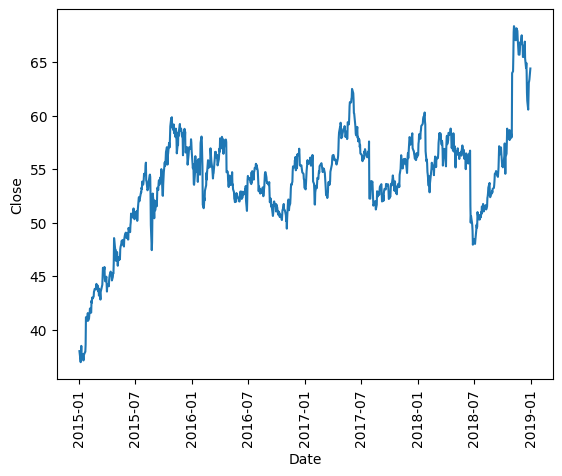

In [ ]:
???
plt.show()

- Slicing the data once the index has been set to the date, can be very useful

In [ ]:
???

,Close,Volume
Date,,
2017-01-03,53.1100,7809307
2017-01-04,53.7241,7796290
2017-01-05,54.1750,7602321
2017-01-06,54.8179,8587812
2017-01-09,55.8446,12640515
...,...,...
2017-12-22,56.0018,7148723
2017-12-26,55.8454,5546208
2017-12-27,55.9724,4812173


In [ ]:
???

55.457310358565735

In [ ]:
# Slice with range of dates
???

,Close,Volume
Date,,
2017-01-03,53.1100,7809307
2017-01-04,53.7241,7796290
2017-01-05,54.1750,7602321
2017-01-06,54.8179,8587812
2017-01-09,55.8446,12640515
2017-01-10,55.5376,6672024
2017-01-11,55.7487,6027960
2017-01-12,55.6815,4733015
2017-01-13,55.5088,4745840


In [ ]:
# resampling the data, for more aliases https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
???

,Close,Volume
Date,,
2015-12-31,12619.6811,2179595896
2016-12-31,13580.7164,2343759515
2017-12-31,13919.7849,2333315537
2018-12-31,14274.3712,2818435669


<Axes: xlabel='Date'>

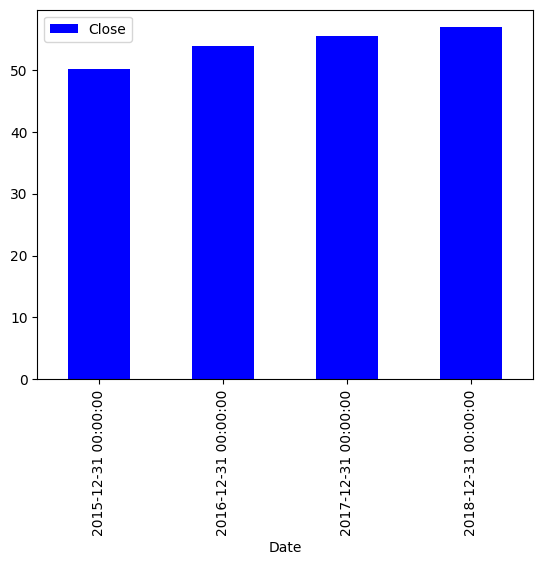

In [ ]:
???

<Axes: xlabel='Date'>

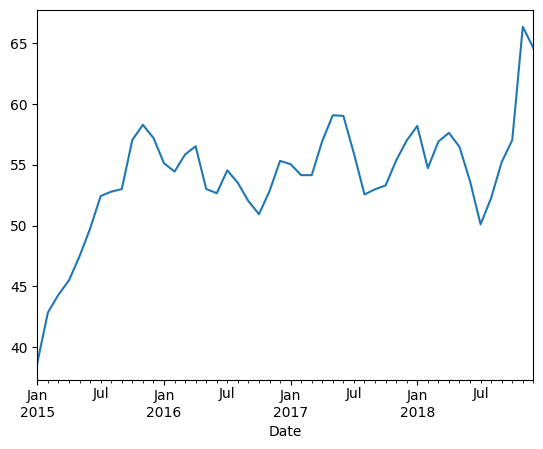

In [ ]:
???

In [ ]:
???

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
???

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


- We will probably use lag variables when fitting ARIMA models.  Can be very helpful to have shifted values of the data.

In [ ]:
???

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [ ]:
???

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [ ]:
???

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [ ]:
???

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [ ]:
# shifting everyting by month
???

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Handling Missing Data

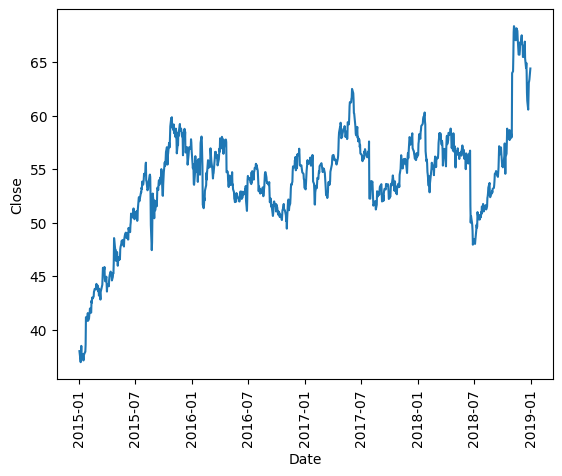

In [ ]:
???

In [ ]:
???

Date
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
2017-01-09   NaN
              ..
2017-07-25   NaN
2017-07-26   NaN
2017-07-27   NaN
2017-07-28   NaN
2017-07-31   NaN
Name: missing_data, Length: 145, dtype: float64

In [ ]:
???

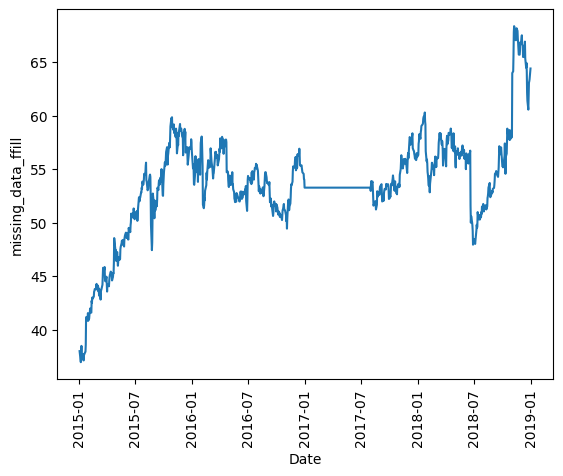

In [ ]:
???

In [ ]:
???

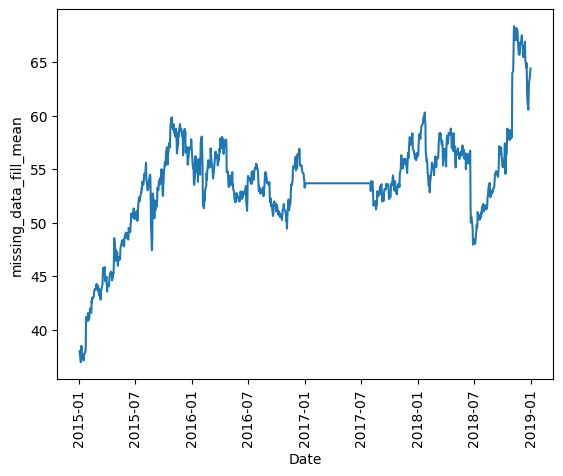

In [ ]:
???

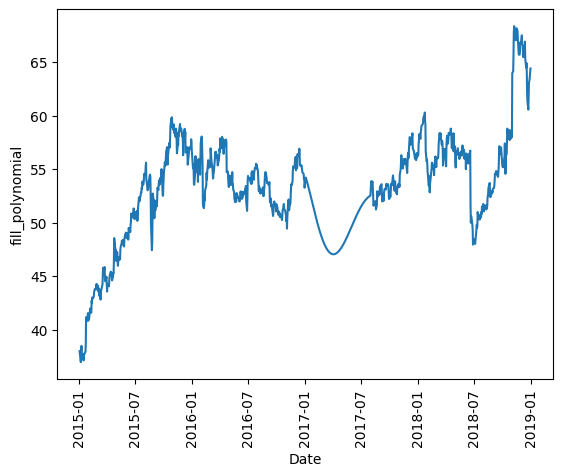

In [ ]:
???

# Basic Data Generating Processes

- All data is generated by some type of ***mechanism***; time series are no exception
- A mechanism is an underlying process that generates the data a.k.a. as a data generating process (DGP)
- This encompasses so much of statistics and its why we start the study of probability and statistics with the study of flipping coins, choosing cards, etc..
- The study of probability and statistics tries to understand 2 complementary processes.
    - We have a process that generates data and we want to understand the data it generates (bottom up: probability - > statistics)
    - We have data and want to understand the process that generated it (top down: statistics - > probability)
- Many of these processes are stochastic, which means they have an underlying data generating process + random noise that is irreducible
- Oftentimes it is helpful to understand the data generating process first to understand the basic models that we will attempt to fit
- If we perfectly understood this data generating process, we wouldn't need statistics, we would just make projections using our DGP, but that would imply perfect knowledge of reality which we don't have.  We settle for the next best thing, which is an approximation or **model**
- A model is an approximation of the DGP

- Let's look at a few DGP that we might use to approximate time series data

## White Noise

- Completely random

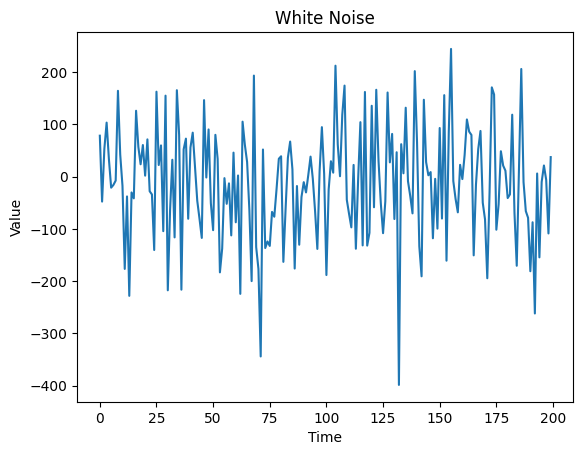

In [ ]:
time = np.arange(200)
white_noise = ???
sns.lineplot(x=time, y=white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Red Noise

- Contains an autocorrelation component where each value is dependent on the previous value
- This idea, that values in a series of data are dependent on previous values (that we can predict the future from the past) is fundamental to the study of time series
- ### $x_{j+1} = r \cdot x_j + \sqrt{(1-r^2)} \cdot w$ where $w$ is white noise data

In [ ]:
# set correlation coefficient
r = 0.99
# Create Red Noise by introducing correlation between subsequent values in the white noise
red_noise = np.zeros(200)
for i, v in enumerate(white_noise):
    if i == 0:
        red_noise[i] = ???
    else:
        red_noise[i] = ???

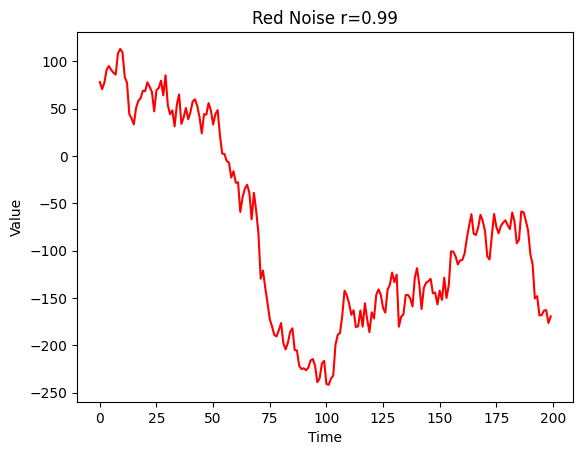

In [1949]:
sns.lineplot(x=time, y=red_noise, c='red')
plt.title(f'Red Noise r={r}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Seasonal or Cyclical Signals

- We usually see a lot of seasonal or cyclical signals in time series data
- Snow pack, for example.  We see the same trends season over season
- Most basic repeating seasonal wave is sine
- Form of the sine function is $y= A \cdot \sin(B(x-C)) + D$ where:
    - A is amplitude (height)
    - B is the $2\pi$/period.  Period is the amount of time the signal takes to repeat.  Frequency, the inverse of period, is the number of repetitions in 1 unit of time.
    - C is the horizontal shift
    - D is the vertical shift

In [ ]:
time = np.arange(0, 40, step=0.2)
freq = 0.25
period = ???
A = ???
B = ???
C = ???
D = ???
sinusoidal_series = A*np.sin(B*time+C) + D

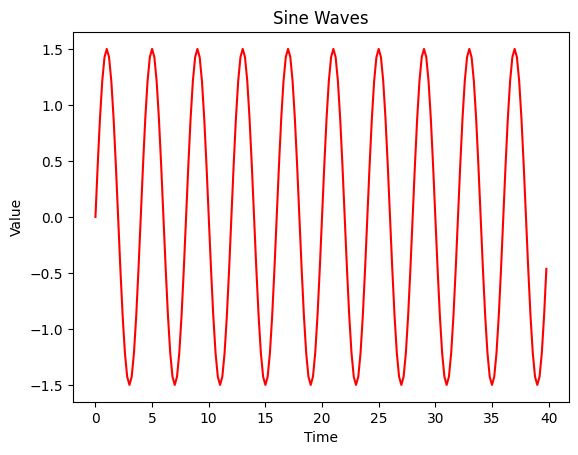

In [1951]:
sns.lineplot(x=time, y=sinusoidal_series, c='red')
plt.title(f'Sine Waves')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

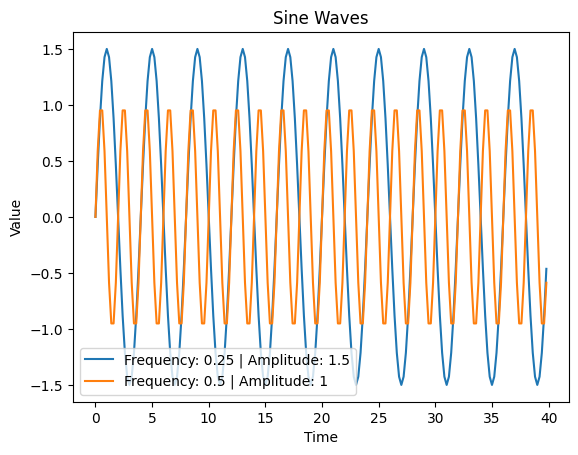

In [ ]:
def sinusoidal(time, freq, amplitude, horiz_shift=0, vertical_shift=0):

    period = ???
    A = ???
    B = ???
    C = ???
    D = ???

    return A*np.sin(B*time+C) + D

parameters = [(0.25, 1.5),
              (0.5, 1)]

for f, a in parameters:
    sns.lineplot(x=time, y=sinusoidal(time, freq=f, amplitude=a), label=f'Frequency: {f} | Amplitude: {a}')

plt.title(f'Sine Waves')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Pseudo-periodic Signal

- Same as sinusoidal, but with random noise

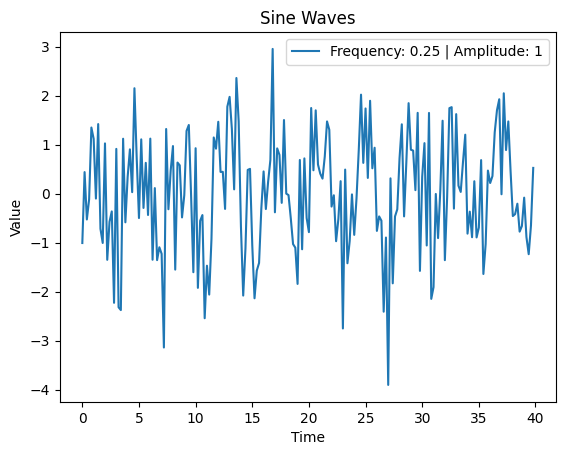

In [ ]:
f = 0.25
a = 1
pseudo_periodic = sinusoidal(time, freq=f, amplitude=a) + ???

sns.lineplot(x=time, y=pseudo_periodic, label=f'Frequency: {f} | Amplitude: {a}')
plt.title(f'Sine Waves')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Autoregressive Signal

- Similar to red noise in that each value in the series is dependent on the previous value
- We will see the come up when we discuss ARIMA models (autoregressive integrated moving average models)
- Basic model is:
    - ### $y_t = b_0 + b_1 \times y_{t-1} + e_t$
- More traditional notation uses phi and generalizes to make each value dependent on the previous p time steps
    - $y_t = \phi_0 + \phi_1 \times y_{t-1} + \phi_2 \times y_{t-2} \times ... \times \phi_p \times y_{t-p} + e_t$
    - An AR(p) model is one where the value at time t depends on all values from t-1 to t-p

In [ ]:
phis = [1.5, -0.75, 0.2]
p = ???
initial_values = ???
print(initial_values)

[ 2.27703496 -1.12672371  2.02700608]


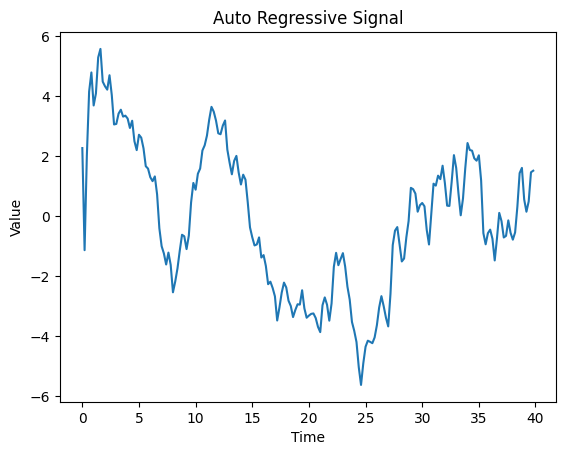

In [ ]:
ar_values = list(initial_values).copy()

for i in np.arange(start=p, stop=len(time)):
    ar_values.append(???)

sns.lineplot(x=time, y=ar_values)
plt.title(f'Auto Regressive Signal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Can Add Together Different Time Series

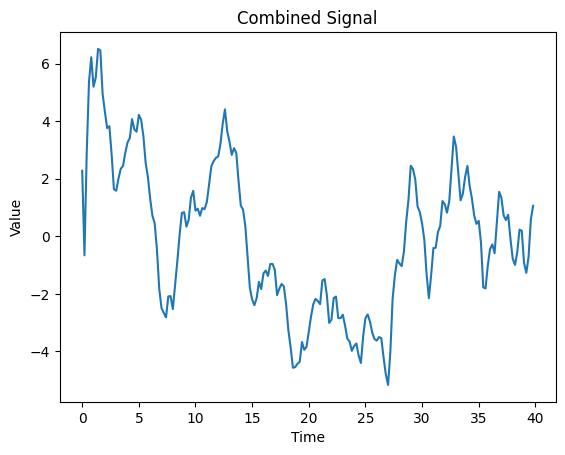

In [1956]:
sns.lineplot(x=time, y=np.array(ar_values) + sinusoidal_series)
plt.title(f'Combined Signal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Stationarity

- Most real world time-series are not stationary or do not exhibit stationarity
- Stationarity is when the probability distribution of the series does not change over time.
- If stationarity does not hold, this means 1 of 2 things:
    - mean changes over time (we see a trend component in our data)
    - variance changes over time (is not homoscedastic, but heteroscedastic)

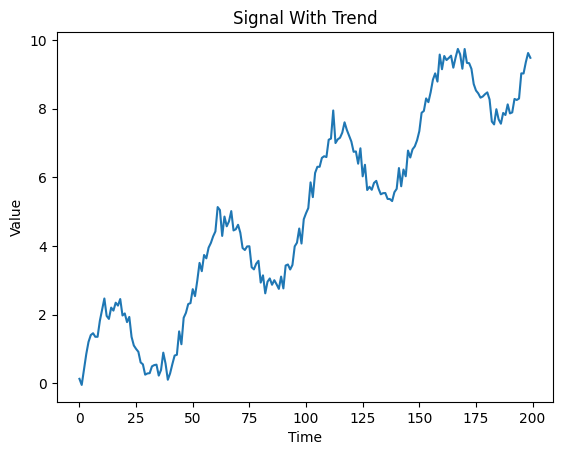

In [ ]:
time = np.arange(200)
f = 0.02
a = 1.5
sinusoidal_series = sinusoidal(time, freq=f, amplitude=a)
white_noise = np.random.randn(200) * 0.25
# add in a trend
trend = ???
sinusoidal_series_with_trend = ???

sns.lineplot(x=time, y=sinusoidal_series_with_trend)
plt.title(f'Signal With Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

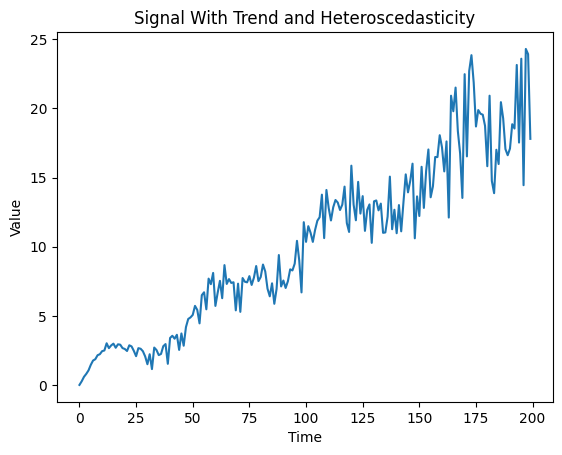

In [ ]:
time = np.arange(200)
f = 0.02
a = 1.5
sinusoidal_series = sinusoidal(time, freq=f, amplitude=a)
white_noise = ???
# add in a trend
trend = time * 0.1
sinusoidal_series_with_trend = sinusoidal_series + trend + white_noise

sns.lineplot(x=time, y=sinusoidal_series_with_trend)
plt.title(f'Signal With Trend and Heteroscedasticity')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# How predictable is a time-series?

- The more data, the better
- The more we understand our DGP, the better
- The more repeatability in our pattern, the better

# Some Useful Terminology

- Forecast: predicting the future from the past
- Multivariate Forecast: forecasting with more than one variable
- Exogenous and endogenous variables: simplest way to understand is to know that exogenous are the x variables (variables from outside the system) and endogenous variables are y variables (variables completely determined from inside the system)